**> * Data Fields**
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier

In [18]:
os.listdir('../input')
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
#count - number of total rentals



In [15]:
train['count'].head(12)

0     16
1     40
2     32
3     13
4      1
5      1
6      2
7      3
8      8
9     14
10    36
11    56
Name: count, dtype: int64

In [16]:
#Aplicando o log a coluna count
train['count'] = np.log(train['count'])

In [17]:
train['count'].head()

0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
Name: count, dtype: float64

In [20]:
math.log(10) - math.log(11)

-0.09531017980432477

In [27]:
print("df: train.csv")
print("Linhas:", train.shape[0] , "\nColunas:", train.shape[1])
print("\ndf: test.csv")
print("Linhas:", test.shape[0] , "\nColunas:", test.shape[1])

df: train.csv
Linhas: 10886 
Colunas: 12

df: test.csv
Linhas: 6493 
Colunas: 9


In [28]:
df = train.append(test)
df['datetime'] = pd.to_datetime(df['datetime'])

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [30]:
df.shape[0]

17379

In [31]:
# Definindo as colunas ano e dia , tendo em vista que a coluna mês já existe
df['year'] = df['datetime'].dt.year
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek


In [32]:
df.columns

Index(['atemp', 'casual', 'count', 'datetime', 'holiday', 'humidity',
       'registered', 'season', 'temp', 'weather', 'windspeed', 'workingday',
       'year', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [35]:
#Ordenando os valores por data e gravando no df
df.sort_values('datetime', inplace=True)

In [38]:
df['datetime'].head(5)

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [40]:
#Tirando a média movel rolling_temp e temp
df['rolling_temp'] = df['temp'].rolling(4, min_periods=1).mean()

In [44]:
df[['rolling_temp', 'temp']].head(10)

,rolling_temp,temp
0,9.840000,9.84
1,9.430000,9.02
2,9.293333,9.02
3,9.430000,9.84
4,9.430000,9.84
5,9.635000,9.84
6,9.635000,9.02
7,9.225000,8.20
8,9.225000,9.84
9,10.045000,13.12


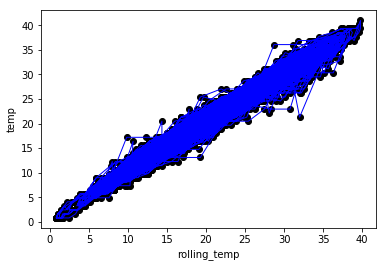

In [59]:
plt.scatter(df.rolling_temp, df.temp,  color='black')
plt.plot(df.rolling_temp, df.temp, color='blue', linewidth=1)
plt.xticks()
plt.yticks()
plt.xlabel("rolling_temp")
plt.ylabel("temp")
plt.show()

In [73]:
#Utilizando get_dummies para transformar variáveis em dummies
#df2 = pd.get_dummies(df)

In [75]:
pd.get_dummies(df['dayofweek'], prefix='prefixo').head()

,prefixo_0,prefixo_1,prefixo_2,prefixo_3,prefixo_4,prefixo_5,prefixo_6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [77]:
df.loc[:, (df.nunique() > 2) & (df.nunique() < 8 )].head()

,season,weather,dayofweek
0,1,1,5
1,1,1,5
2,1,1,5
3,1,1,5
4,1,1,5


In [78]:
#Criando um gráfico da temperatura das estações 
#df[''] = df2[df2['season'] == 1]
#verao  = dftrain[dftrain['season'] == 2]
#outono = dftrain[dftrain['season'] == 3]
#inverno = dftrain[dftrain['season'] == 4]

In [79]:
for col in df.loc[:, (df.nunique() > 2 ) & (df.nunique() < 8 )].columns:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col).iloc[:, :-1]], 
                  axis=1)
    del df[col]

In [81]:
df.columns

Index(['atemp', 'casual', 'count', 'datetime', 'holiday', 'humidity',
       'registered', 'temp', 'windspeed', 'workingday', 'year', 'day', 'hour',
       'rolling_temp', 'season_1', 'season_2', 'season_3', 'weather_1',
       'weather_2', 'weather_3', 'dayofweek_0', 'dayofweek_1', 'dayofweek_2',
       'dayofweek_3', 'dayofweek_4', 'dayofweek_5'],
      dtype='object')

In [84]:
df['dayofweek_1'].unique()

array([0, 1], dtype=uint64)

In [91]:
train_raw  = df[~df['count'].isnull()]
test = df[df['count'].isnull()]

# Separando em treino e validação

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
train, valid = train_test_split(train_raw, random_state=42)

In [101]:
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [103]:
#Criando um dicionário 
models = {'RandomForest': RandomForestRegressor(random_state=42),
         'ExtraTreesRegressor': ExtraTreesRegressor(random_state=42),
         'GBM': GradientBoostingRegressor(random_state=42),
         'DecisionTree': DecisionTreeRegressor(random_state=42),
         'AdaBoost': AdaBoostRegressor(random_state=42), 
         'KNN 1': KNeighborsRegressor(n_neighbors=1),
         'KNN 3': KNeighborsRegressor(n_neighbors=3),
         'KNN 3': KNeighborsRegressor(n_neighbors=11),
         'SVR': SVR(), 
         'Linear Regression': LinearRegression()}

In [104]:
removed_cols = ['count', 'casual', 'registered', 'datetime']

In [105]:

feats = [c for c in df.columns if c not in removed_cols]

In [106]:
feats

['atemp',
 'holiday',
 'humidity',
 'temp',
 'windspeed',
 'workingday',
 'year',
 'day',
 'hour',
 'rolling_temp',
 'season_1',
 'season_2',
 'season_3',
 'weather_1',
 'weather_2',
 'weather_3',
 'dayofweek_0',
 'dayofweek_1',
 'dayofweek_2',
 'dayofweek_3',
 'dayofweek_4',
 'dayofweek_5']

In [137]:
removed_cols
from sklearn.metrics import  mean_squared_error


In [138]:
#Criando uma função
def run_model(model,train,valid,feats,y_name):
    model.fit(train[feats],train[y_name])
    preds =model.predict(valid[feats])
    return mean_squared_error(valid[y_name],preds)**(1/2)

In [139]:
#Removendo a exibição dos erros de deprecação do sklearn
import warnings
warnings.filterwarnings('ignore', category= FutureWarning)

In [ ]:
scores=[]
for name ,model in models.items():
    score=run_model(model,train,valid,feats,'count')
    scores.append(score)
    print (name+':',score)